<a href="https://colab.research.google.com/github/TioSatrio100/Bitcoin-Fraud-Detection-Machine-Learning/blob/main/BitcoinFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,  BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
df=pd.read_csv('BitcoinHeistData.csv')

In [ ]:
df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


In [ ]:
df.isnull().sum()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

# **Exploratory Analysis**

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For display purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = math.ceil(nCol / nGraphPerRow)  # Round up to ensure the result is an integer
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()
Let me know if you nee

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    # Remove columns containing NaN
    df = df.dropna(axis='columns')
    # Keep columns that have more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]
    # Select only numeric columns
    df = df.select_dtypes(include=[float, int])
    if df.shape[1] < 2:
        print("Not enough numeric columns to create a correlation matrix.")
        return

    corr = df.corr()
    plt.figure(figsize=(graphWidth, graphWidth))
    sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5, square=True)
    plt.title(f'Correlation Matrix')
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # Retain only numeric columns
    # Remove columns containing NaN
    df = df.dropna(axis='columns')
    # Keep columns that have more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)

    if len(columnNames) < 2:
        print("Not enough numeric columns to create a scatter matrix.")
        return

    fig, ax = plt.subplots(figsize=(plotSize, plotSize))
    scatter_matrix = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=(plotSize, plotSize), diagonal='kde', ax=ax)

    # Set text size
    corrs = df.corr().values
    for i, j in zip(*np.tril_indices_from(corrs, k=-1)):
        ax = scatter_matrix[i, j]
        ax.annotate(f'{corrs[i, j]:.2f}', (0.5, 0.9), xycoords='axes fraction', ha='center', va='center', fontsize=textSize)

    plt.suptitle('Scatter Matrix')
    plt.show()

In [ ]:
nRowsRead = 10000
df1 = pd.read_csv('BitcoinHeistData.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'BitcoinHeistData.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10000 rows and 10 columns


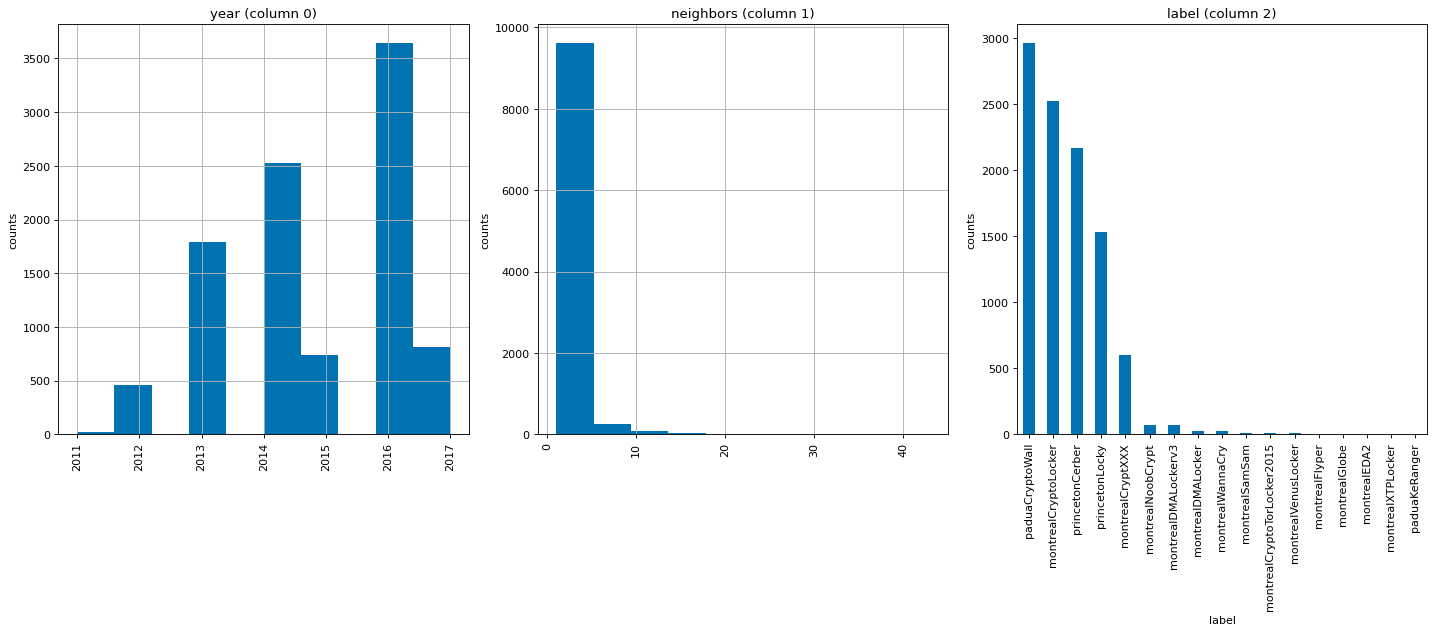

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

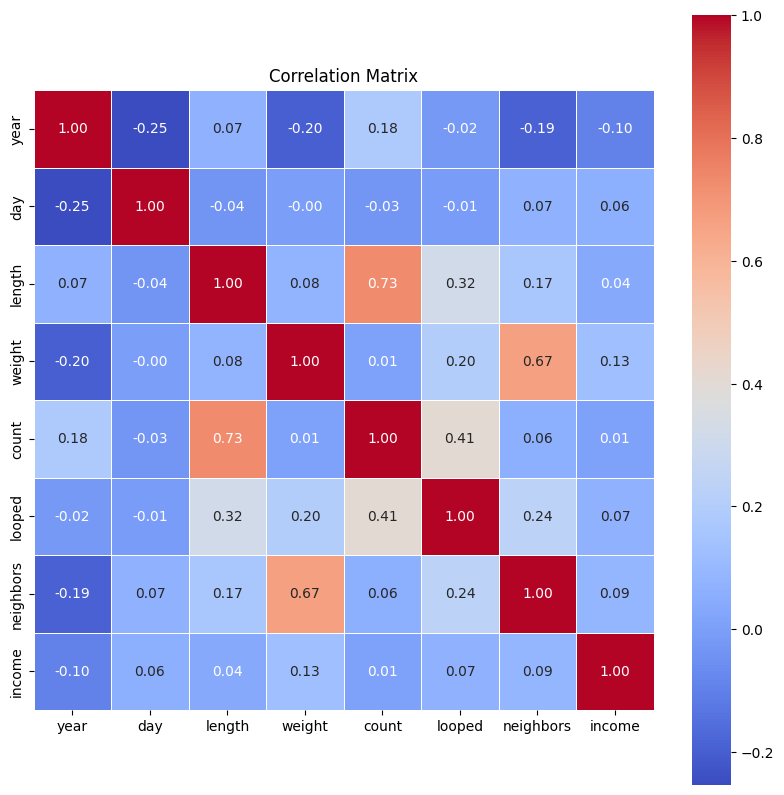

In [ ]:
plotCorrelationMatrix(df1, 10)

<ipython-input-116-949adf96118b>:15: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=(plotSize, plotSize), diagonal='kde', ax=ax)


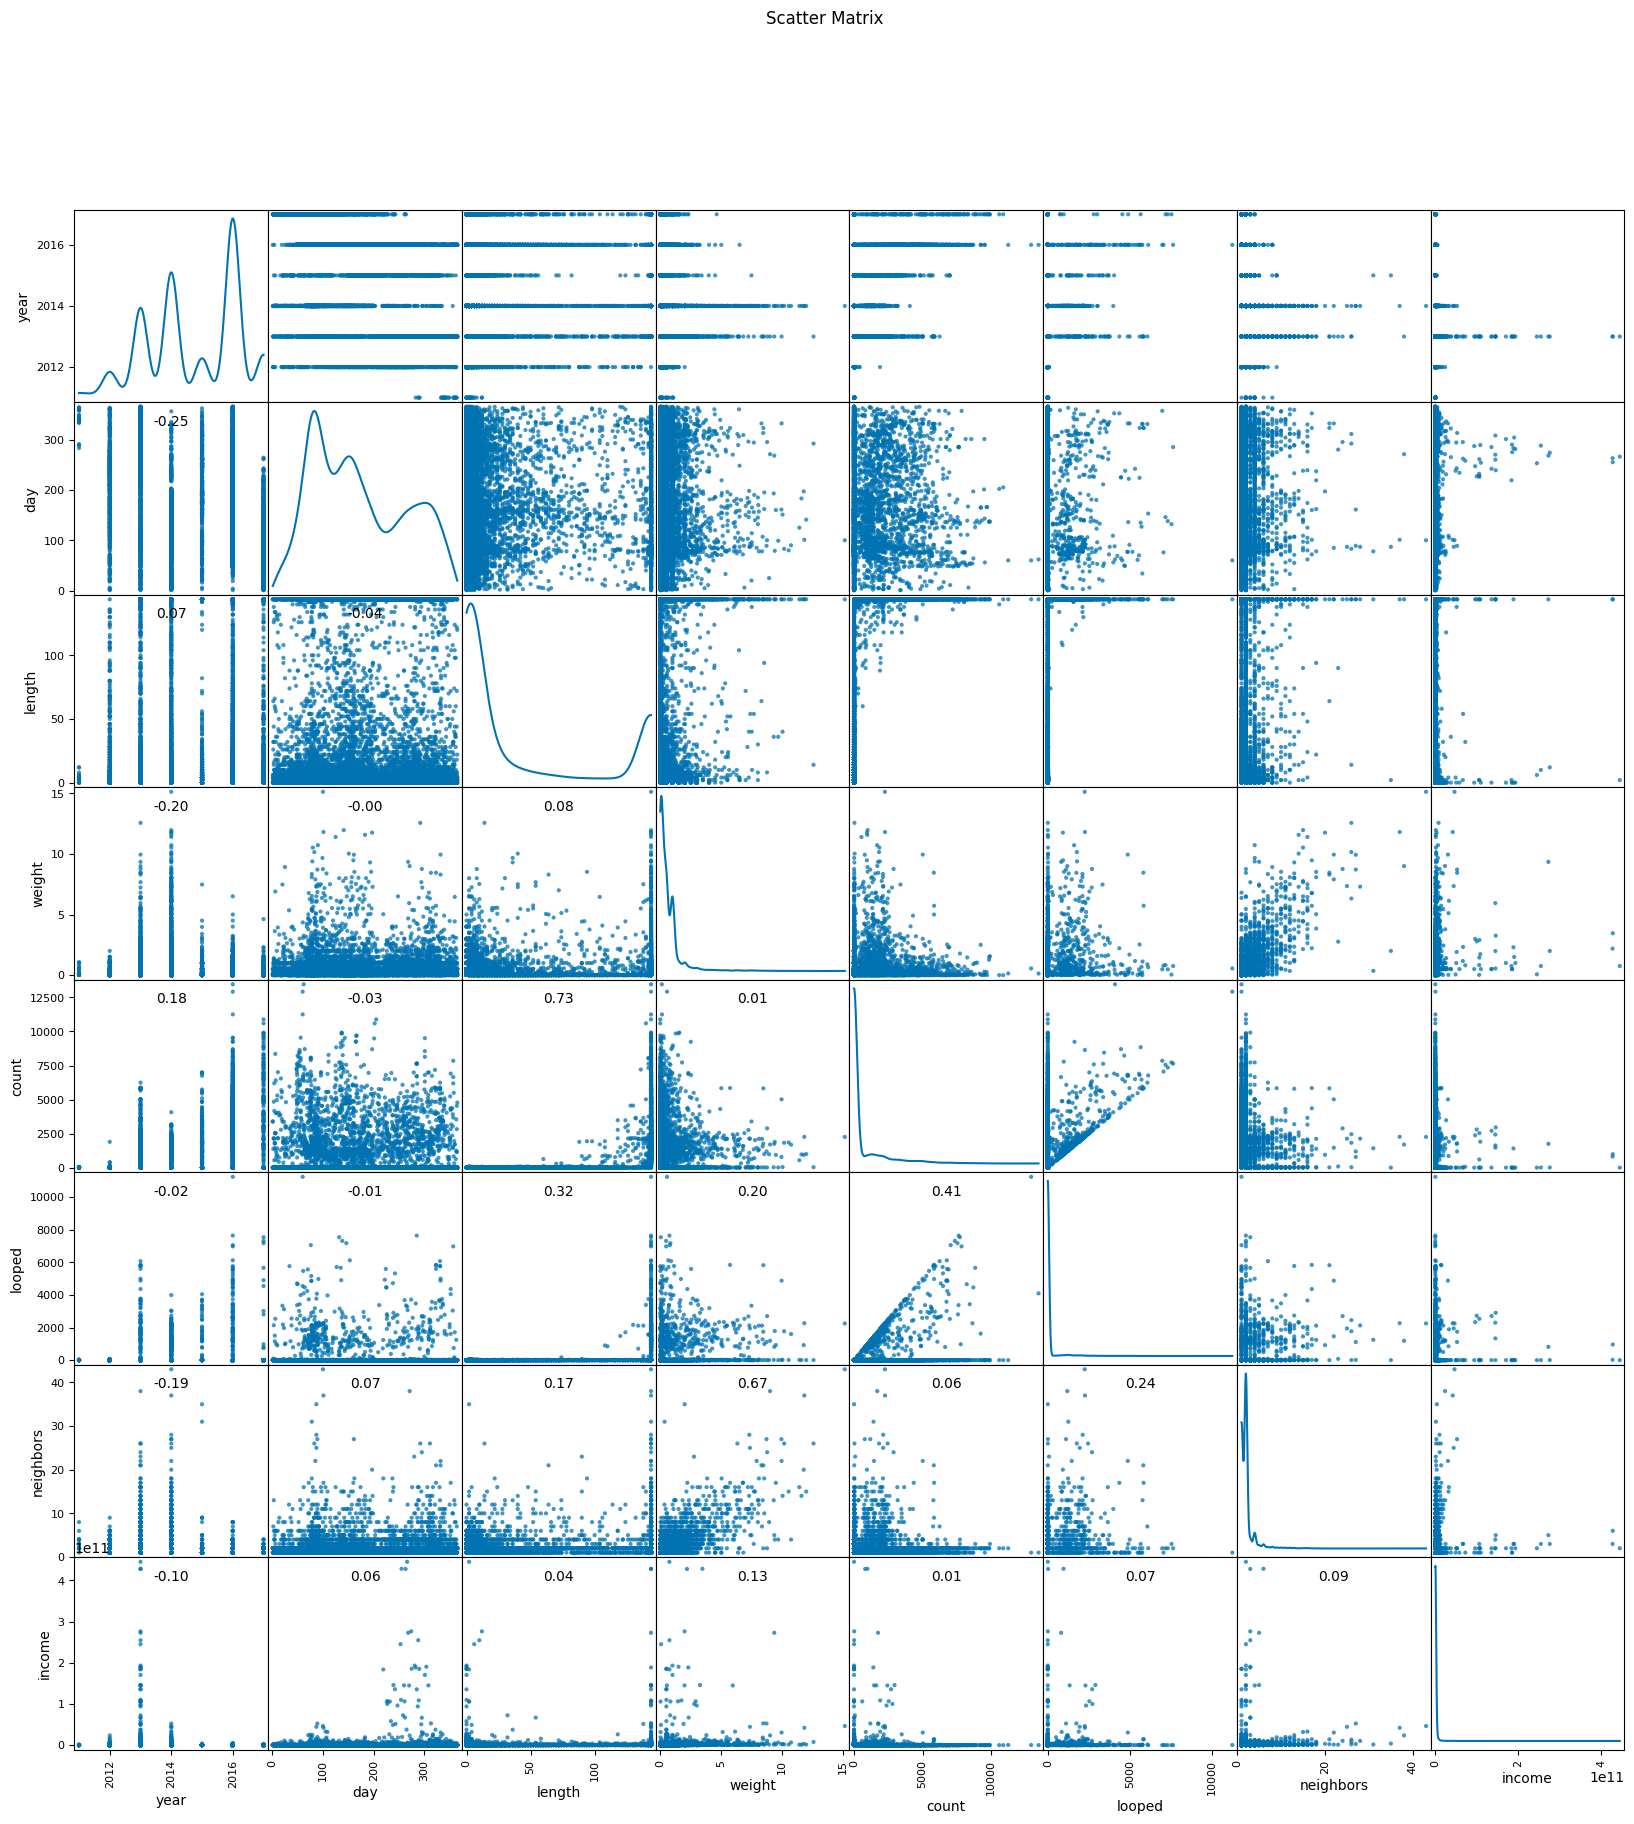

In [ ]:
plotScatterMatrix(df1, 20, 10)

In [ ]:
df.drop(columns=["address","year","day"],axis=1,inplace=True)
for col in df.columns[:-1]:
    df[col]=df[col]
X=df.drop(columns=["label"])
y=df["label"]
X.columns
df.head()

,length,weight,count,looped,neighbors,income,label
0,18,0.008333,1,0,2,100050000.0,princetonCerber
1,44,0.000244,1,0,1,100000000.0,princetonLocky
2,0,1.000000,1,0,2,200000000.0,princetonCerber
3,72,0.003906,1,0,2,71200000.0,princetonCerber
4,144,0.072848,456,0,1,200000000.0,princetonLocky


In [ ]:
new_df=pd.DataFrame()
grouped=df.groupby("label")
new_df["num_of_instances"]=grouped.size()

In [ ]:
for col in X.columns:
    new_df[f"{col}_avg"]=grouped[col].mean()
new_df.head()

,label,num_of_instances,length_avg,weight_avg,count_avg,looped_avg,neighbors_avg,income_avg,length_std,weight_std,...,count_min,looped_min,neighbors_min,income_min,length_max,weight_max,count_max,looped_max,neighbors_max,income_max
0,montrealAPT,11,NaN,NaN,NaN,NaN,NaN,NaN,73.145434,0.600596,...,1,0,1,57142857.0,144,1.666667,8076,8073,6,1.088599e+09
1,montrealComradeCircle,1,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,1241,0,2,203320001.0,144,0.051214,1241,0,2,2.033200e+08
2,montrealCryptConsole,7,NaN,NaN,NaN,NaN,NaN,NaN,68.747987,0.410909,...,1,0,2,30000000.0,144,1.000000,3191,0,2,5.030000e+07
3,montrealCryptXXX,2419,NaN,NaN,NaN,NaN,NaN,NaN,58.187904,0.434143,...,1,0,1,30000000.0,144,3.458951,9262,8489,15,1.080000e+09
4,montrealCryptoLocker,9315,NaN,NaN,NaN,NaN,NaN,NaN,50.731602,1.555608,...,1,0,1,30000000.0,144,31.108593,6423,6418,79,4.450000e+11


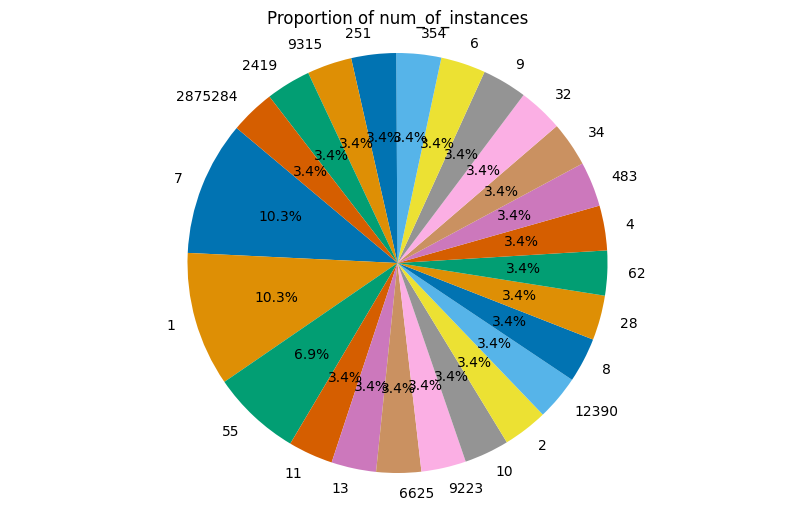

In [ ]:
# @title num_of_instances

counts = new_df['num_of_instances'].value_counts()


plt.figure(figsize=(10, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of num_of_instances')
plt.axis('equal')
plt.show()

In [ ]:
for col in X.columns:
    new_df[f"{col}_std"]=grouped[col].agg(np.std).fillna(0)

In [ ]:
for col in X.columns:
    new_df[f"{col}_min"]=grouped[col].min()

In [ ]:
for col in X.columns:
    new_df[f"{col}_max"]=grouped[col].max()

In [ ]:
new_df=new_df.reset_index()
new_df.head()

,label,num_of_instances,length_avg,weight_avg,count_avg,looped_avg,neighbors_avg,income_avg,length_std,weight_std,...,count_min,looped_min,neighbors_min,income_min,length_max,weight_max,count_max,looped_max,neighbors_max,income_max
0,montrealAPT,11,67.636364,0.707728,2047.000000,734.090909,2.545455,3.719873e+08,73.145434,0.600596,...,1,0,1,57142857.0,144,1.666667,8076,8073,6,1.088599e+09
1,montrealComradeCircle,1,144.000000,0.051214,1241.000000,0.000000,2.000000,2.033200e+08,0.000000,0.000000,...,1241,0,2,203320001.0,144,0.051214,1241,0,2,2.033200e+08
2,montrealCryptConsole,7,43.428571,0.593306,831.714286,0.000000,2.000000,4.546334e+07,68.747987,0.410909,...,1,0,2,30000000.0,144,1.000000,3191,0,2,5.030000e+07
3,montrealCryptXXX,2419,47.447706,0.367505,791.848284,61.022323,2.011988,1.355343e+08,58.187904,0.434143,...,1,0,1,30000000.0,144,3.458951,9262,8489,15,1.080000e+09
4,montrealCryptoLocker,9315,30.674396,0.888878,308.328824,100.981535,2.885346,1.840825e+09,50.731602,1.555608,...,1,0,1,30000000.0,144,31.108593,6423,6418,79,4.450000e+11


In [ ]:
black_rows=df[df["label"]!="white"]
white_sample=df[df["label"]=="white"].sample(n=158587,random_state=42)
sampled_df=pd.concat([black_rows,white_sample]).sample(frac=1,random_state=50)
sampled_df.head()

,length,weight,count,looped,neighbors,income,label
526724,14,0.003906,1,0,2,3.216000e+09,white
2825235,144,0.196970,1805,0,2,5.578352e+07,white
7558,14,0.015625,1,0,2,6.355311e+08,montrealCryptoLocker
1141393,6,1.000000,1,0,2,2.925100e+08,white
1484054,142,0.065711,2568,0,2,1.360000e+08,white


In [ ]:
# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the labels
sampled_df['label'] = label_encoder.fit_transform(sampled_df['label'])

# Map 'white' to 0 and other values to 1
sampled_df['label'] = sampled_df['label'].apply(lambda x: 0 if x == label_encoder.transform(['white'])[0] else 1)

sampled_df['label']

526724     0
2825235    0
7558       1
1141393    0
1484054    0
          ..
1363905    0
1934713    0
2481475    0
2039010    0
880386     0
Name: label, Length: 200000, dtype: int64

In [ ]:
z_score_df=pd.DataFrame()
for col in sampled_df.columns:
    z_score_df[f"{col}_z_score"]=(sampled_df[col]-sampled_df[col].mean())/sampled_df[col].std()
z_score_df.head()

,length_z_score,weight_z_score,count_z_score,looped_z_score,neighbors_z_score,income_z_score,label_z_score
526724,-0.513441,-0.114174,-0.424426,-0.234473,-0.009561,-0.004920,-0.511015
2825235,1.695481,-0.075626,0.677535,-0.234473,-0.009561,-0.028981,-0.511015
7558,-0.513441,-0.111834,-0.424426,-0.234473,-0.009561,-0.024567,1.956881
1141393,-0.649374,0.084711,-0.424426,-0.234473,-0.009561,-0.027178,-0.511015
1484054,1.661498,-0.101834,1.143608,-0.234473,-0.009561,-0.028370,-0.511015


In [ ]:
X=sampled_df.drop("label",axis=1)
y=(sampled_df["label"]>0).astype('int')

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=42,
                                   test_size=0.33,
                                   shuffle=True)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
model = Sequential([
    Dense(232, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2,  callbacks=[early_stopping])

Epoch 1/50
1675/1675 [==============================] - 10s 5ms/step - loss: 0.5440 - accuracy: 0.7663 - val_loss: 0.4949 - val_accuracy: 0.7960
Epoch 2/50
1675/1675 [==============================] - 10s 6ms/step - loss: 0.4876 - accuracy: 0.7911 - val_loss: 0.4737 - val_accuracy: 0.7962
Epoch 3/50
1675/1675 [==============================] - 8s 5ms/step - loss: 0.4796 - accuracy: 0.7920 - val_loss: 0.4675 - val_accuracy: 0.7971
Epoch 4/50
1675/1675 [==============================] - 9s 5ms/step - loss: 0.4745 - accuracy: 0.7921 - val_loss: 0.4626 - val_accuracy: 0.7969
Epoch 5/50
1675/1675 [==============================] - 10s 6ms/step - loss: 0.4696 - accuracy: 0.7926 - val_loss: 0.4680 - val_accuracy: 0.7967
Epoch 6/50
1675/1675 [==============================] - 8s 5ms/step - loss: 0.4671 - accuracy: 0.7932 - val_loss: 0.4642 - val_accuracy: 0.7982
Epoch 7/50
1675/1675 [==============================] - 11s 6ms/step - loss: 0.4660 - accuracy: 0.7927 - val_loss: 0.4637 - val_accur

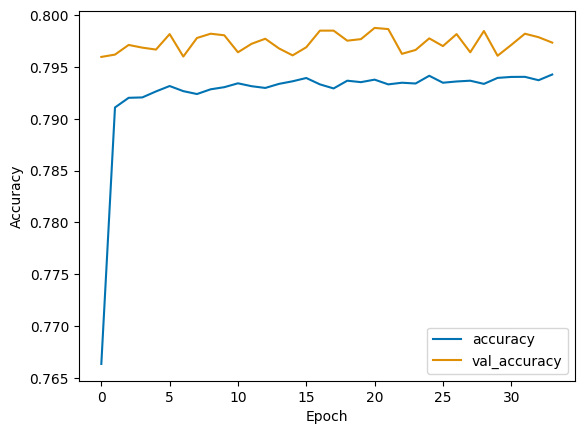

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

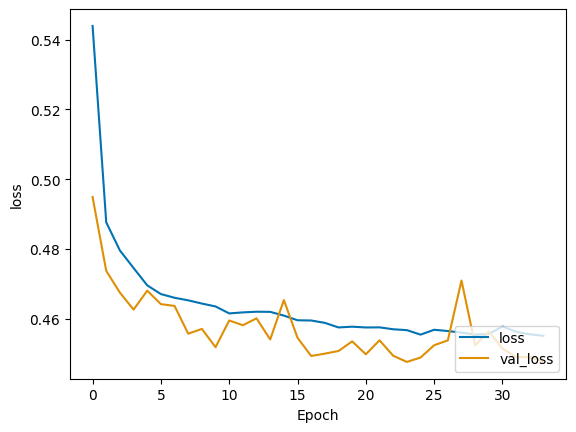

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()